# Multimodal EDE params 

In [1]:
from MP_classes_lkl_prof_functions import *

## Tristan's high and low $z_c$ runs 

In [2]:
highz = lkl_prof('/home2/karwal/lkl_prof/P_EDE_highz/', 'P_EDE_highz', 'fraction_axion_ac')
lowz = lkl_prof('/home2/karwal/lkl_prof/P_EDE_lowz/', 'P_EDE_lowz', 'fraction_axion_ac')
# if you don't have MCMC chains, ensure that the info_root (the second argument) is the same as the folder name, as shown in this example.
# also ensure that the .bestfit and .covmat files you have are named <info_root>.bestfit and <info_root>.covmat

In [3]:
highz.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
highz.prof_max = 0.14
highz.prof_min = 0.01
highz.processes = 1

lowz.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
lowz.prof_max = 0.14
lowz.prof_min = 0.01
lowz.processes = 1

In [4]:
highz.global_min()
lowz.global_min();

check_global_min: Found minimum with file name P_EDE_highz
match_param_names: Params match - the recorded params contain the same params as param_names passed. 
check_global_min: Found minimum with file name P_EDE_lowz
match_param_names: Params match - the recorded params contain the same params as param_names passed. 


In [5]:
print("Global minimum:")
print(highz.global_ML)
print(lowz.global_ML)

Global minimum:
{'omega_b': 0.02257503, 'omega_cdm': 0.1246276, 'h': 0.6873121, 'ln10^{10}A_s': 3.057877, 'n_s': 0.9763184, 'tau_reio': 0.05659879, 'scf_parameters__1': 2.940234, 'fraction_axion_ac': 0.04862259, 'log10_axion_ac': -3.793996, 'A_cib_217': 48.32553, 'xi_sz_cib': 0.2929354, 'A_sz': 7.271477, 'ps_A_100_100': 254.7472, 'ps_A_143_143': 46.93437, 'ps_A_143_217': 44.66515, 'ps_A_217_217': 118.7347, 'ksz_norm': 0.04609716, 'gal545_A_100': 8.782958, 'gal545_A_143': 11.10415, 'gal545_A_143_217': 19.74525, 'gal545_A_217': 94.87766, 'galf_TE_A_100': 0.1141105, 'galf_TE_A_100_143': 0.1365105, 'galf_TE_A_100_217': 0.4795231, 'galf_TE_A_143': 0.2292161, 'galf_TE_A_143_217': 0.6643125, 'galf_TE_A_217': 2.085498, 'calib_100T': 0.9997086, 'calib_217T': 0.9982117, 'A_planck': 1.000793, 'sigma8': 0.8255204, 'Omega_m': 0.3129706, 'age': 13.54899, 'rs_rec': 142.0601, 'rs_d': 144.5172, 'da_rec': 12.50915, 'z_rec': 1089.064, 'ds_rec': 0.1303227, 'ds_d': 0.1360966, '100*theta_s': 1.041819, '-log

In [6]:
highz_output = highz.full_lkl_prof_dict()
lowz_output = lowz.full_lkl_prof_dict()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
highz_x = highz_output['fraction_axion_ac']
highz_y = highz_output['-logLike']

In [9]:
lowz_x = lowz_output['fraction_axion_ac']
lowz_y = lowz_output['-logLike']

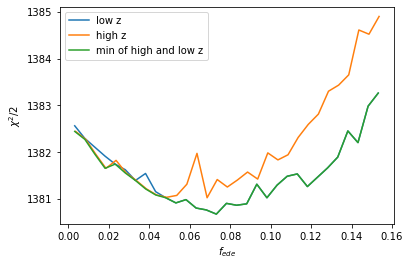

In [10]:
plt.plot(lowz_x, lowz_y, label="low z")
plt.plot(highz_x, highz_y, label="high z")

min_high_low = [min(lowz_y[i], highz_y[i]) for i in range(len(lowz_x))]
plt.plot(lowz_x, min_high_low, label="min of high and low z")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
# plt.xlim([min(yashvi_x), max(yashvi_x)])
# plt.ylim([min(yashvi_x)-0.1, max(yashvi_x)])
plt.legend()
plt.show()

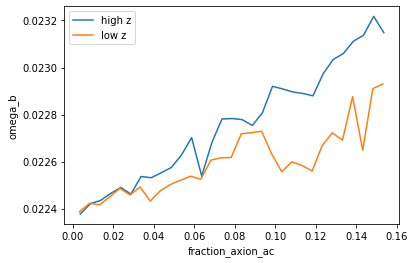

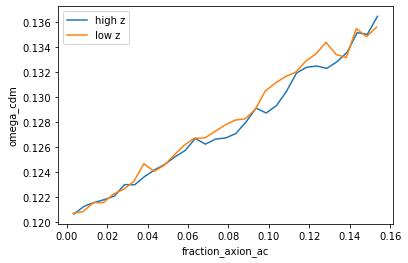

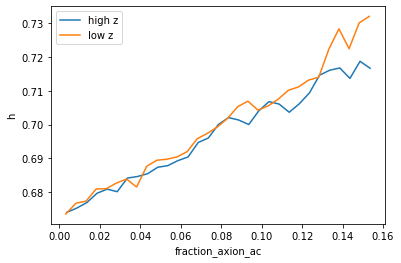

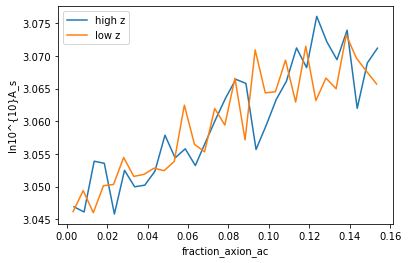

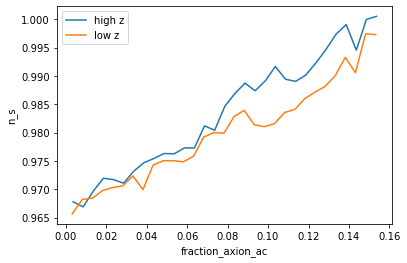

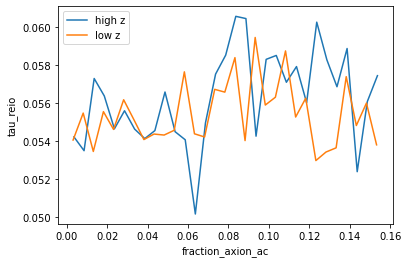

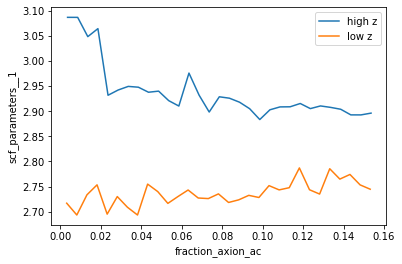

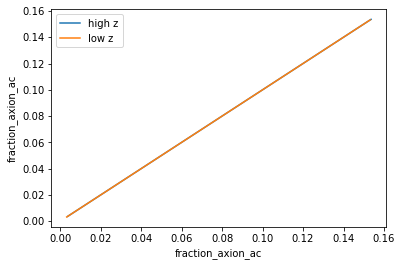

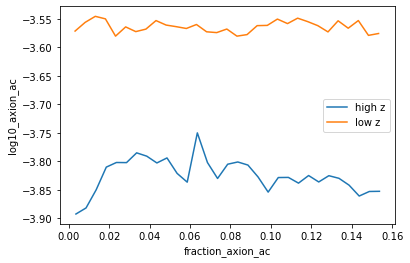

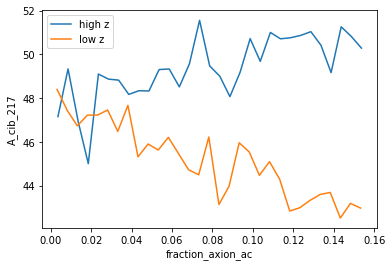

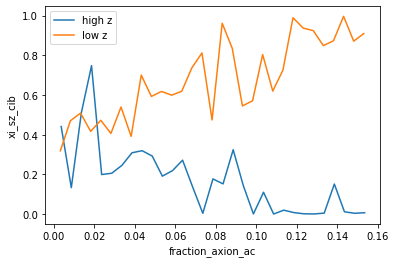

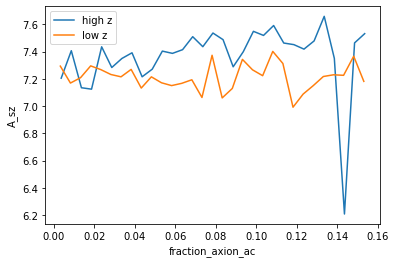

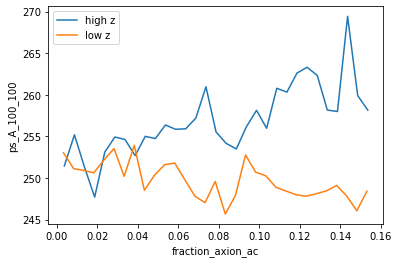

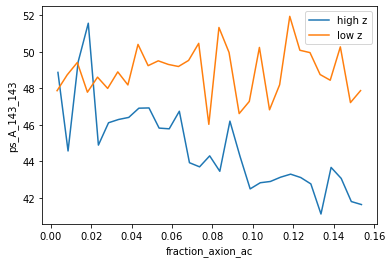

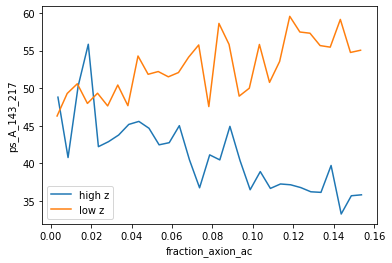

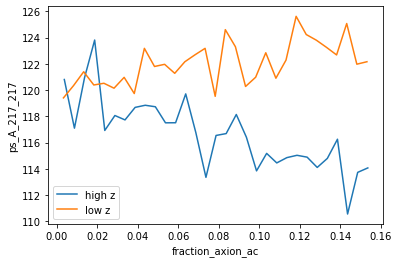

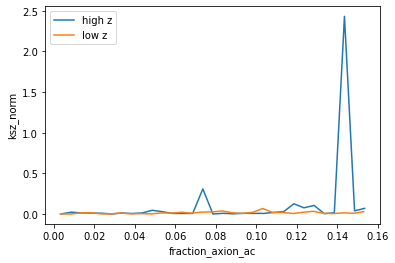

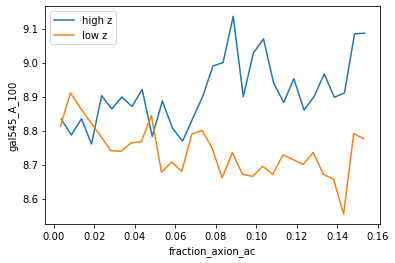

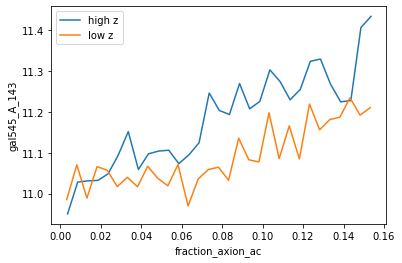

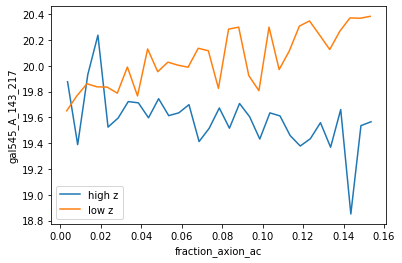

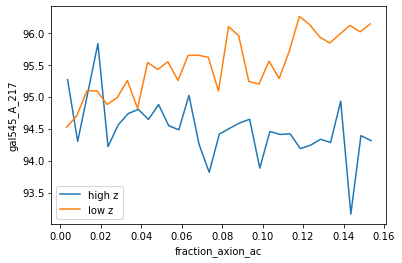

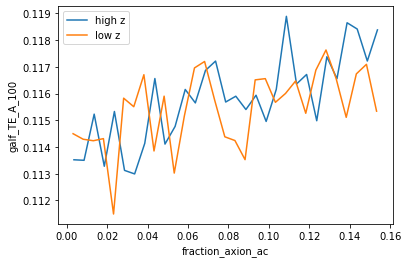

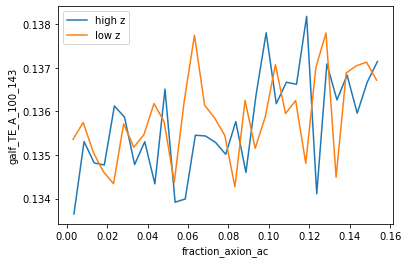

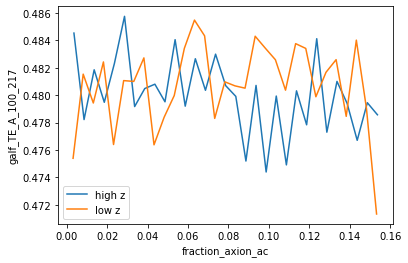

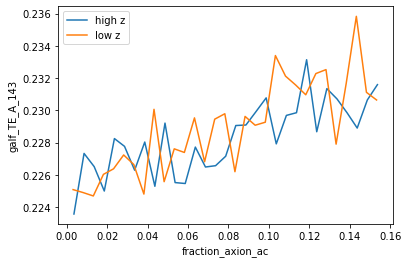

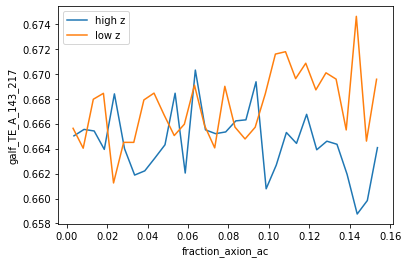

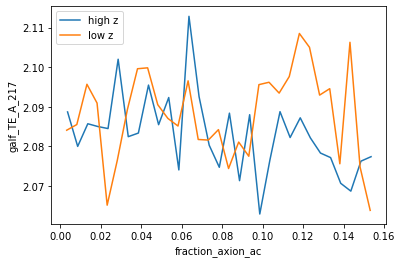

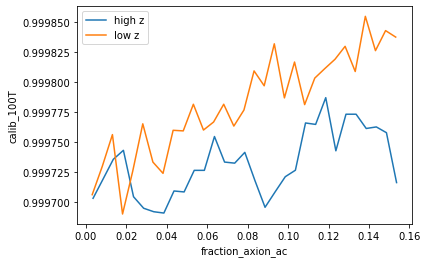

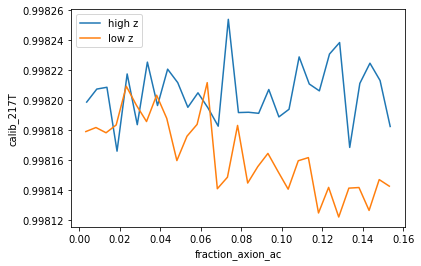

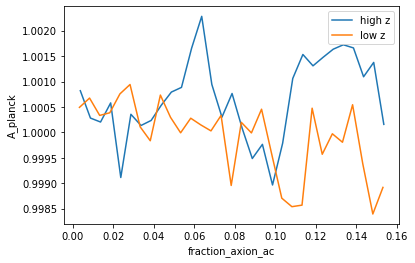

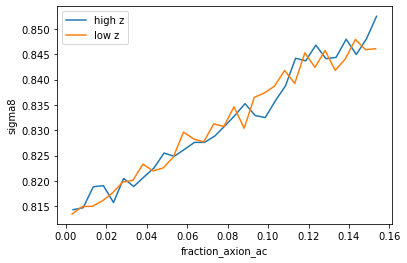

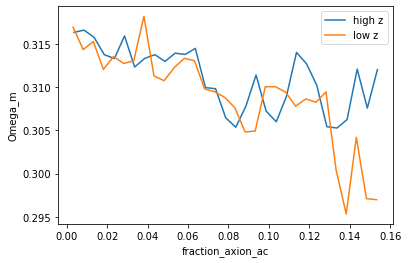

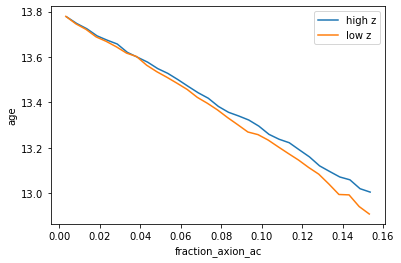

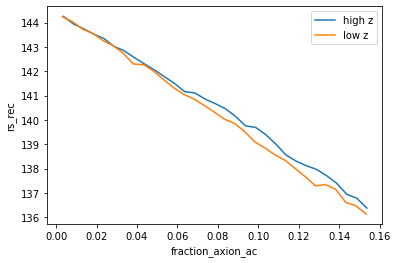

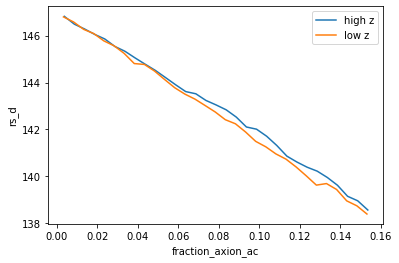

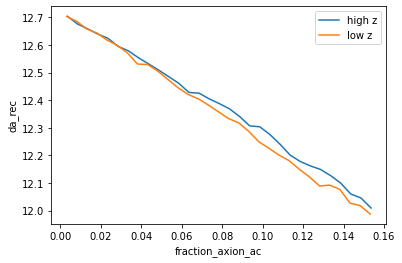

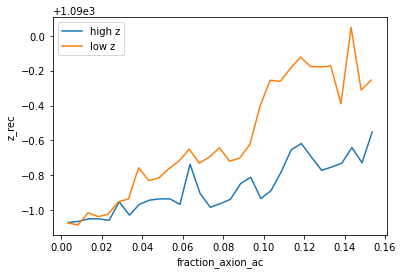

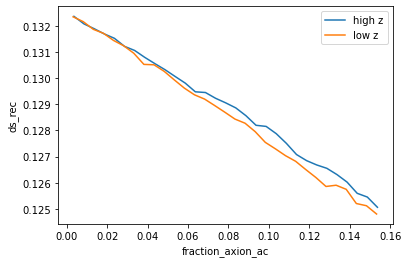

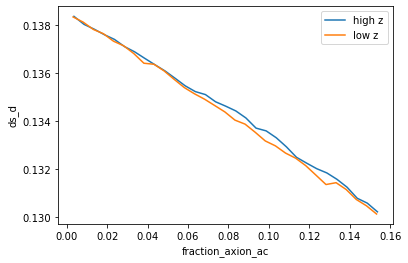

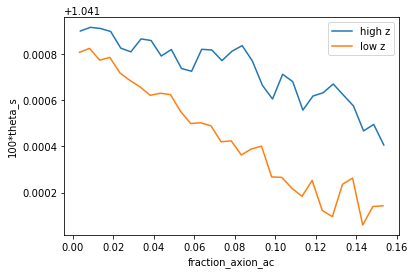

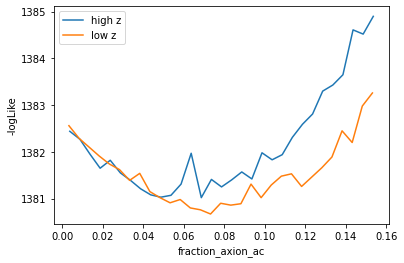

In [21]:
for param in highz.param_order:
    lx = lowz_output[lowz.prof_param]
    ly = lowz_output[param]
    hx = highz_output[highz.prof_param]
    hy = highz_output[param]
    
    plt.plot(hx, hy, label="high z")
    plt.plot(lx, ly, label="low z")

    plt.ylabel(param)
    plt.xlabel(highz.prof_param)
#     plt.xlim([min(x), max(x)])
#     plt.ylim([min(y), max(y)])
    plt.legend()
    plt.show()

## Yashvi's run

In [11]:
yashvi = lkl_prof('/home2/karwal/lkl_prof/Yashvi_non_parabolic_chi2/', 'planck_fede', 'fraction_axion_ac')

yashvi.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
yashvi.prof_max = 0.14
yashvi.prof_min = 0.01
yashvi.processes = 1

yashvi.global_ML = get_MP_bf_dict(yashvi.chains_dir+'planck_fede/planck_fede.bestfit')
yashvi.param_order = read_header_as_list(yashvi.chains_dir+'planck_fede_+fraction_axion_ac_lkl_profile.txt')

In [12]:
print("Global minimum:")
print(yashvi.global_ML)

Global minimum:
{0.02262609: 'omega_b', 0.1242533: 'omega_cdm', 0.6909933: 'h', 3.052278: 'ln10^{10}A_s', 0.9795191: 'n_s', 0.05539626: 'tau_reio', 2.931837: 'scf_parameters__1', 0.05202657: 'fraction_axion_ac', -3.795181: 'log10_axion_ac', 47.72671: 'A_cib_217', 0.3632496: 'xi_sz_cib', 7.272315: 'A_sz', 253.74: 'ps_A_100_100', 47.63453: 'ps_A_143_143', 46.82874: 'ps_A_143_217', 119.6834: 'ps_A_217_217', 0.007241073: 'ksz_norm', 8.960738: 'gal545_A_100', 11.16717: 'gal545_A_143', 19.81652: 'gal545_A_143_217', 94.93781: 'gal545_A_217', 0.1147175: 'galf_TE_A_100', 0.1353448: 'galf_TE_A_100_143', 0.4800059: 'galf_TE_A_100_217', 0.2251487: 'galf_TE_A_143', 0.6645263: 'galf_TE_A_143_217', 2.079834: 'galf_TE_A_217', 0.9997204: 'calib_100T', 0.9981926: 'calib_217T', 1.000103: 'A_planck', 0.8215245: 'sigma8', 0.3089679: 'Omega_m', 13.52566: 'age', 142.0351: 'rs_rec', 144.4779: 'rs_d', 12.50796: 'da_rec', 281.5191: 'tau_d', 276.1042: 'tau_rec', 1088.984: 'z_rec', 1.041811: '100*theta_s', 0.0520

In [14]:
yashvi_output = yashvi.full_lkl_prof_dict()

yashvi_x = yashvi_output['f_ede']
yashvi_y = yashvi_output['-logLike']

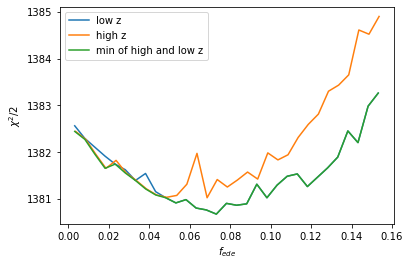

In [15]:
plt.plot(lowz_x, lowz_y, label="low z")
plt.plot(highz_x, highz_y, label="high z")
# plt.plot(yashvi_x, yashvi_y, label="Yashvi's run")


min_high_low = [min(lowz_y[i], highz_y[i]) for i in range(len(lowz_x))]
plt.plot(lowz_x, min_high_low, label="min of high and low z")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
# plt.xlim([min(yashvi_x), max(yashvi_x)])
# plt.ylim([min(yashvi_x)-0.1, max(yashvi_x)])
plt.legend()
plt.show()

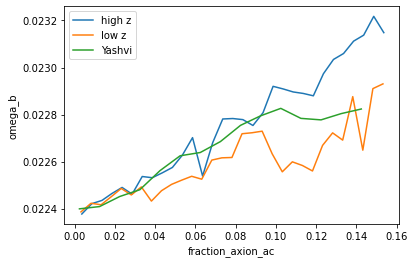

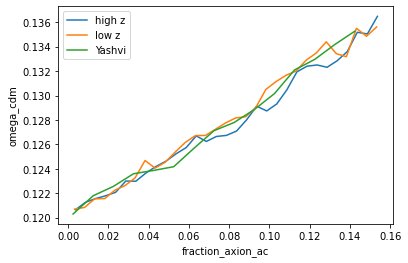

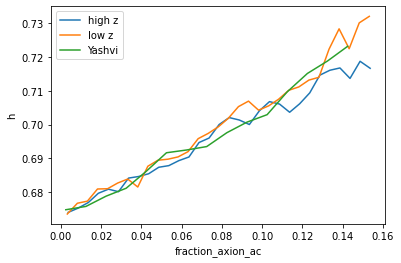

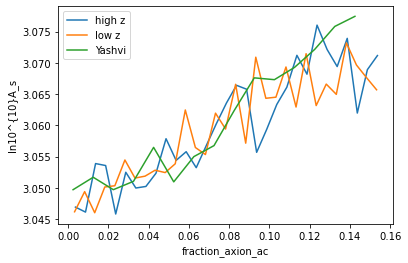

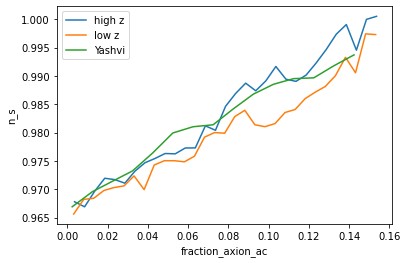

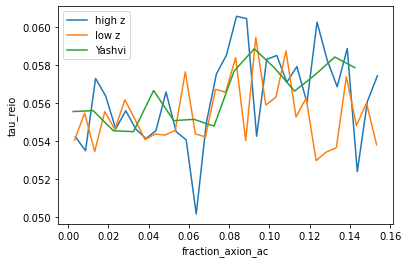

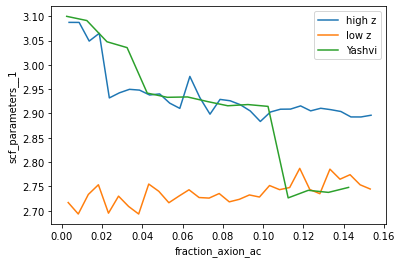

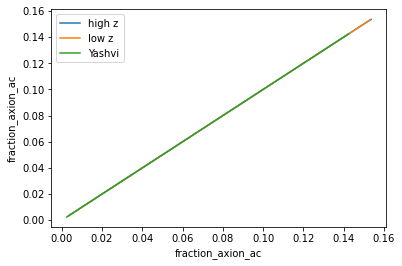

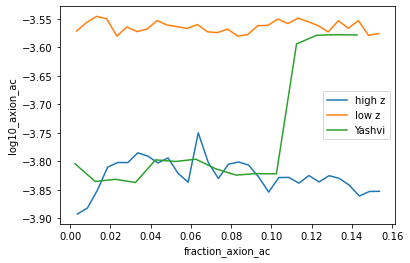

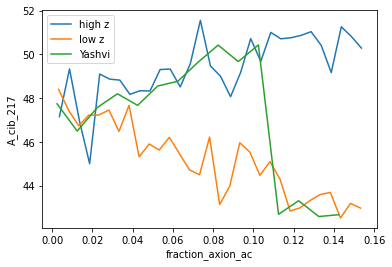

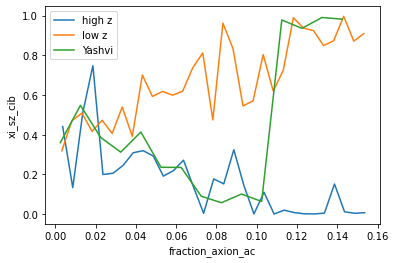

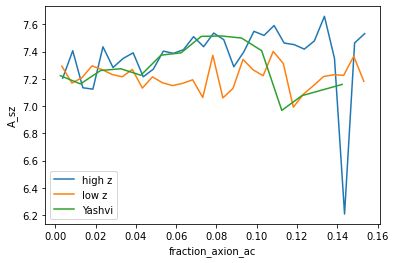

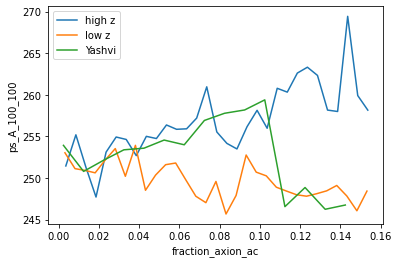

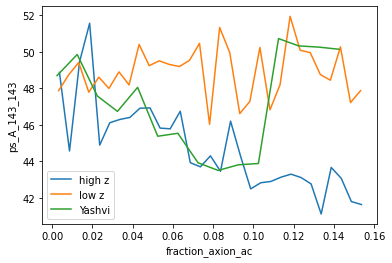

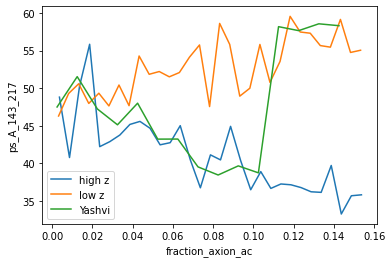

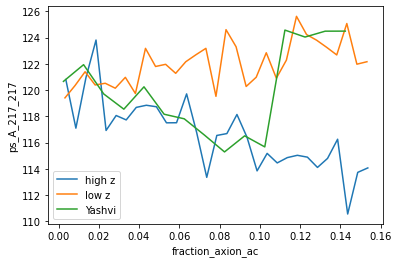

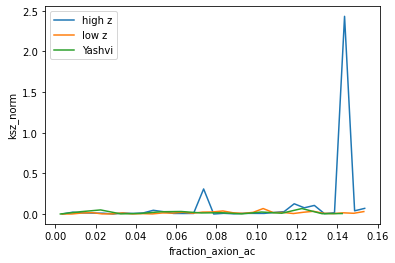

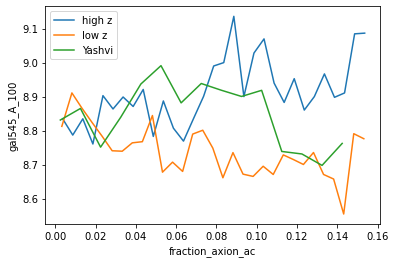

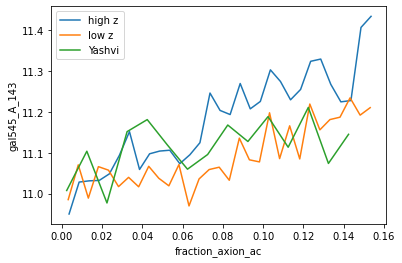

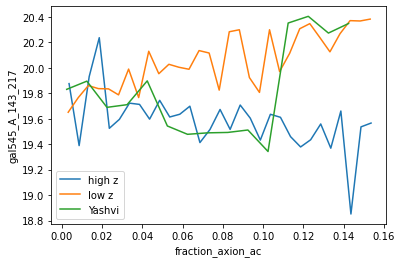

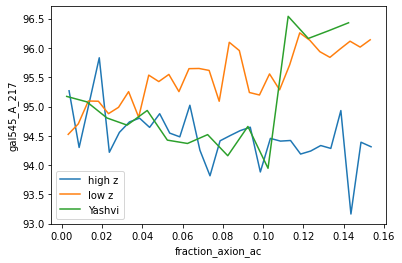

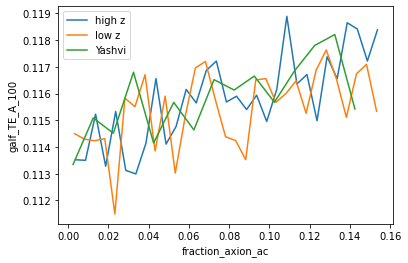

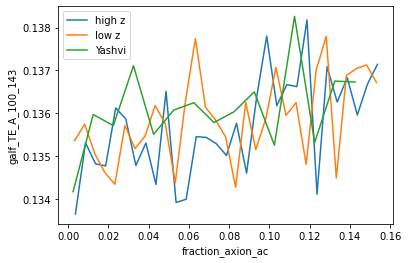

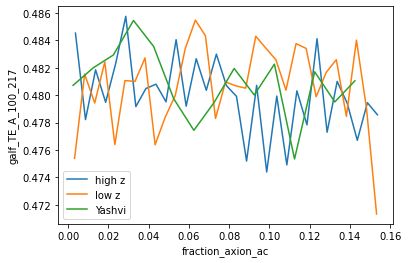

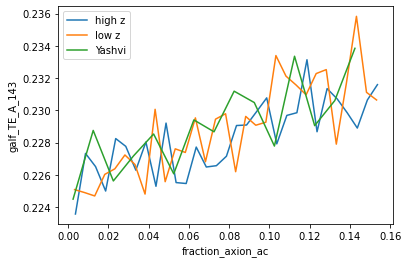

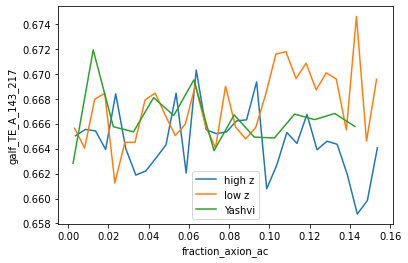

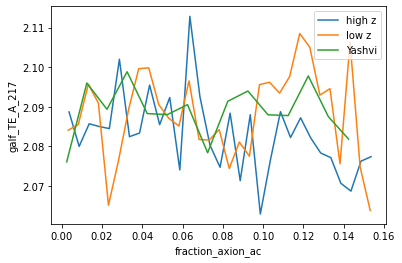

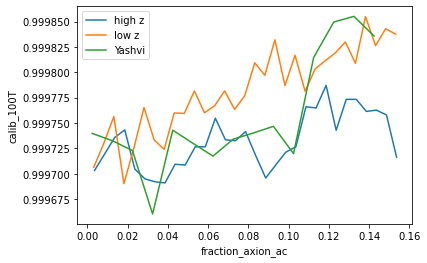

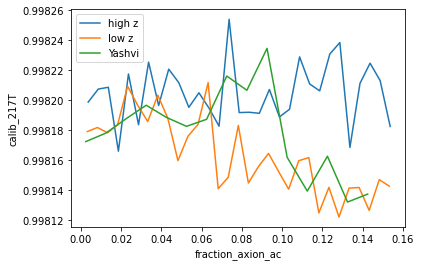

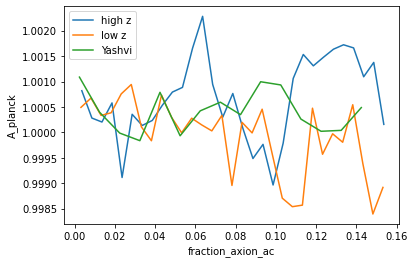

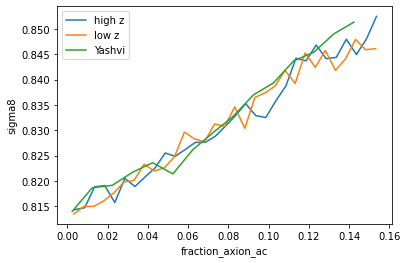

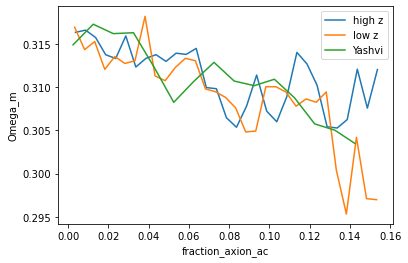

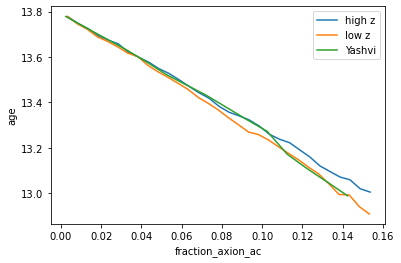

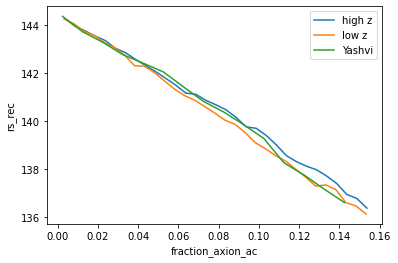

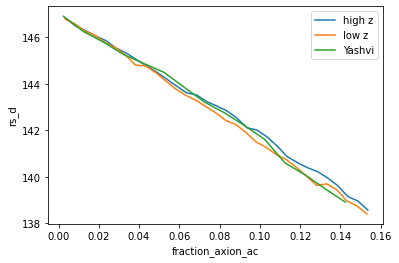

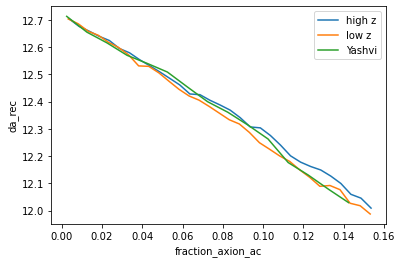

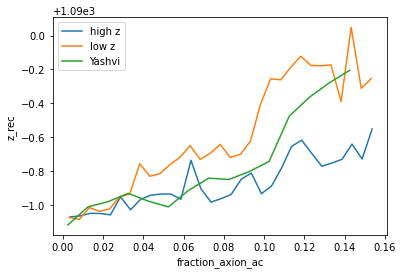

KeyError: 'ds_rec'

In [28]:
for param in highz.param_order:
    lx = lowz_output[lowz.prof_param]
    ly = lowz_output[param]
    hx = highz_output[highz.prof_param]
    hy = highz_output[param]
    
    yx = yashvi_output[yashvi.prof_param]
    yy = yashvi_output[param]
    
    
    plt.plot(hx, hy, label="high z")
    plt.plot(lx, ly, label="low z")
    plt.plot(yx, yy, label="Yashvi")
    

    plt.ylabel(param)
    plt.xlabel(highz.prof_param)
#     plt.xlim([min(x), max(x)])
#     plt.ylim([min(y), max(y)])
    plt.legend()
    plt.show()

## Compare MCMC to prof lkl

In [16]:
ede_mcmc = mcsamples.loadMCSamples('/home2/karwal/mcmc_chains/ede_lkl_profile/scf_3p_base/scf_f_z_scf1_cmb_bao_sne_', settings=highz.mcmc_chain_settings)

In [17]:
ede_mcmc.getParamNames().list();

In [18]:
mcmc_params = ['log10_axion_ac','scf_parameters__1','h','chi2']

mcmc_vectors = {}
mcmc_vectors['log10_axion_ac'] = ede_mcmc.getParams().log10_axion_ac
mcmc_vectors['scf_parameters__1'] = ede_mcmc.getParams().scf_param_1
mcmc_vectors['h'] = ede_mcmc.getParams().H0/100.
mcmc_vectors['chi2'] = ede_mcmc.getParams().chi2__planck_2018_lowl.TT \
                        + ede_mcmc.getParams().chi2__planck_2018_lowl.EE \
                        + ede_mcmc.getParams().chi2__planck_2018_highl_plik.TTTEEE
# Direct comparison requires just CMB temp and pol chi2's 

mcmc_prof_param_vector = ede_mcmc.getParams().f_ede

lkl_prof_param = lowz_output[lowz.prof_param]

In [19]:
min_vectors = {}
for param in mcmc_params:
    min_vectors[param] = []

min_prof_param_vector = []

tolerance = 0.005 # tolerance set to prof lkl step size 

for pp in lkl_prof_param:
    pp_matches = np.where( np.abs(mcmc_prof_param_vector-pp)<tolerance ) 
    try:
        min_chi = min( mcmc_vectors['chi2'][pp_matches] )
#         print("min_chi = {:2f}".format(min_chi))
        for i in pp_matches[0]:
            mcmc_chi = mcmc_vectors['chi2'][i]
            if mcmc_chi == min_chi:
                index_min = i
            
        min_prof_param_vector.append(mcmc_prof_param_vector[index_min])
        
        for param in mcmc_params:
            min_vectors[param].append(mcmc_vectors[param][index_min])
    except ValueError:
        pass

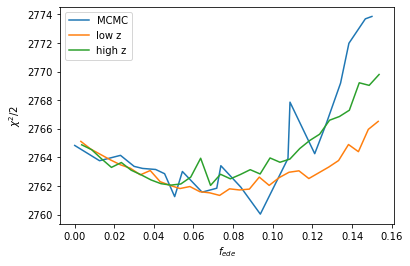

In [21]:
# plt.plot( lkl_prof_param , chis , label='Lkl prof')
plt.plot( min_prof_param_vector , min_vectors['chi2'] , label='MCMC')
plt.plot(lowz_x, lowz_y*2, label="low z")
plt.plot(highz_x, highz_y*2, label="high z")
# plt.plot(yashvi_x, yashvi_y*2, label="Yashvi's run")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
plt.legend()
plt.show()

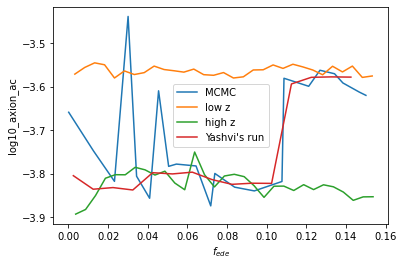

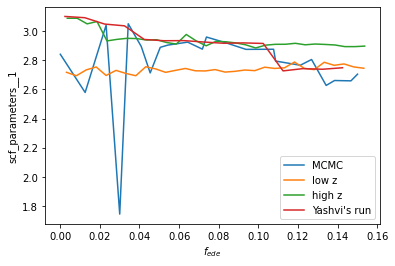

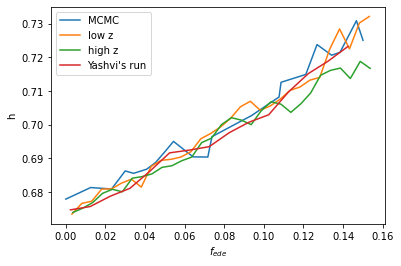

In [50]:
plots_for = ['log10_axion_ac','scf_parameters__1','h']

for plot_param in plots_for:

    plt.plot( min_prof_param_vector , min_vectors[plot_param] , label='MCMC')
    plt.plot(lowz_output[lowz.prof_param], lowz_output[plot_param], label="low z")
    plt.plot(highz_output[highz.prof_param], highz_output[plot_param], label="high z")
    plt.plot(yashvi_output[yashvi.prof_param], yashvi_output[plot_param], label="Yashvi's run")

    plt.ylabel(plot_param)
    plt.xlabel(r'$f_{ede}$')
    plt.legend()
    plt.show()

## Algorithm tweaks to jump between local minima

By setting $-lklfac \sim 2-3$, we may be able to have a sharper contrast between the two modes. Then, setting $-j \geq 1$, we can incentivise the the minimiser to jump between modes, with probability favouring the high-likelihood mode. 

Testing ground below. The code that was finally run is under 
    *multimodal_algo_VP.py*

In [2]:
ede = lkl_prof('/home2/karwal/lkl_prof/VP_rec_multimodal_Feb28/', 'planck_fede', 'fraction_axion_ac')

In [3]:
ede.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
ede.prof_max = 0.14
ede.prof_min = 0.01
ede.processes = 2

In [4]:
ede.check_global_min()

check_global_min: Found minimum with file name planck_fede


True

In [5]:
ede.jump_fac = [1, 0.5, 0.2, 0.1, 0.05]
ede.lkl_fac = [2, 3, 10, 200, 1000]

In [ ]:
ede.global_min(run_glob_min=True,N_min_steps=500)

In [14]:
info_string = "j_{:}_lkl_{:}".format(ede.jump_fac[0], ede.lkl_fac[0])
copy_bf = "cp "+ede.chains_dir+"global_min/global_min.bestfit "+ede.chains_dir+"min_"+info_string+".bestfit"

In [15]:
run(copy_bf, shell=True)

CompletedProcess(args='cp /home2/karwal/lkl_prof/VP_rec_multimodal_Feb28/global_min/global_min.bestfit /home2/karwal/lkl_prof/VP_rec_multimodal_Feb28/min_j_1_lkl_2.bestfit', returncode=0)

$\theta^{pl} \rightarrow \theta^{pl}_{bf} + \delta \theta^{pl}$

$\vec{\theta}_{bf}|\theta^{pl}=\theta^{pl}_{bf} + \delta \theta^{pl}$

$\chi^2$ 